In [2]:
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import numpy as np
# seaborn
import seaborn as sns
# scikit-learn
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.inspection import plot_partial_dependence
# statsmodels
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.formula.api import ols
from statsmodels.stats.diagnostic import normal_ad

from scipy.stats import normaltest

In [3]:
# plot styling and resolution
plt.style.available
#plt.style.use('seaborn')
plt.style.use('seaborn-pastel')
plt.rcParams["figure.figsize"] = [12, 8]

In [4]:
# import json data + convert

df = pd.read_json('politicans.json')

# convert date_received into datetime format
df['date_of_birth'] = pd.to_datetime(df['date_of_birth'])

# pol partei?
# np.where(condition, value if condition is true, value if condition is false)
df["pol"] = np.where(((df["fraction_id"]==3) | (df["fraction_id"]==1)), 1, 0)

# df overview
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 124 entries, 0 to 123
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype                                
---  ------                       --------------  -----                                
 0   id                           124 non-null    int64                                
 1   city                         124 non-null    object                               
 2   age_in_days                  124 non-null    int64                                
 3   fraction                     124 non-null    object                               
 4   fraction_id                  124 non-null    int64                                
 5   days_in_parlament            124 non-null    int64                                
 6   distance_to_parlament        124 non-null    float64                              
 7   number_of_affairs            124 non-null    int64                                
 8   number_of_

,id,age_in_days,fraction_id,days_in_parlament,distance_to_parlament,number_of_affairs,number_of_debate_statements,pol
count,124.000000,124.000000,124.000000,124.000000,124.000000,124.000000,124.000000,124.000000
mean,187.056452,16474.854839,3.483871,2410.427419,5953.918380,1.604839,5.338710,0.330645
std,56.887466,8300.785524,1.376244,1543.247195,5722.036064,2.422183,6.950331,0.472354
min,100.000000,0.000000,1.000000,188.000000,31.332427,0.000000,0.000000,0.000000
25%,130.750000,14703.500000,2.000000,916.000000,2646.817805,0.000000,1.000000,0.000000
50%,207.500000,19358.000000,4.000000,2379.000000,3392.820555,1.000000,3.000000,0.000000
75%,238.250000,22086.500000,5.000000,3648.250000,8758.215584,2.000000,6.000000,1.000000
max,269.000000,26943.000000,5.000000,5843.000000,20581.402066,14.000000,32.000000,1.000000


In [9]:
# get top 10 politicans

# get total of affairs
print(df["number_of_affairs"].sum())

df.nlargest(11, "number_of_affairs")

199


,id,city,age_in_days,fraction,fraction_id,days_in_parlament,distance_to_parlament,number_of_affairs,number_of_debate_statements,first_name,last_name,gender,date_of_birth,location,avatar,created_at,updated_at,fractions,pol
2,126,Giswil,22962,SVP Fraktion,3,3836,8984.569690,14,32,Albert,Sigrist,M,1958-02-18,"{'type': 'Point', 'coordinates': [8.1835455, 4...",http://0.0.0.0:8000/media/import/politicans/ow...,2021-04-08 15:39:11.858467+02:00,2021-08-19 15:00:41.508011+02:00,[3],1
38,138,Sarnen,22506,SP Fraktion,1,5297,964.568182,11,27,Max,Rötheli,M,1959-05-20,"{'type': 'Point', 'coordinates': [8.2374264099...",http://0.0.0.0:8000/media/import/politicans/ow...,2021-04-08 15:39:11.980624+02:00,2021-08-19 15:00:41.711255+02:00,[1],1
53,153,Giswil,24648,SP Fraktion,1,3105,8936.731523,9,17,Ambros,Albert,M,1953-07-08,"{'type': 'Point', 'coordinates': [8.1822806, 4...",http://0.0.0.0:8000/media/import/politicans/ow...,2021-04-08 15:39:12.150038+02:00,2021-08-19 15:07:50.755282+02:00,[1],1
30,120,Giswil,21520,CVP Fraktion,5,4566,9889.616726,8,13,Peter,Wälti,M,1962-01-30,"{'type': 'Point', 'coordinates': [8.1599208, 4...",http://0.0.0.0:8000/media/import/politicans/ow...,2021-04-08 15:39:11.799810+02:00,2021-08-19 15:00:41.409906+02:00,[5],0
44,144,Alpnach Dorf,24343,CVP Fraktion,5,2379,5299.519913,8,19,Marcel,Jöri-Wallimann,M,1954-05-09,"{'type': 'Point', 'coordinates': [8.2736829, 4...",http://0.0.0.0:8000/media/import/politicans/ow...,2021-04-08 15:39:12.046663+02:00,2021-08-19 15:00:41.808317+02:00,[5],0
65,211,Kerns,20625,SP Fraktion,1,4744,3901.899716,8,30,Ruth,Koch-Niederberger,F,1964-07-13,"{'type': 'Point', 'coordinates': [8.2789962126...",http://0.0.0.0:8000/media/import/politicans/ow...,2021-04-08 15:39:12.287671+02:00,2021-08-19 15:00:42.145568+02:00,[1],1
55,200,Alpnach Dorf,22673,CSP Fraktion,2,5109,3936.079382,7,24,Walter,Wyrsch,M,1958-12-04,"{'type': 'Point', 'coordinates': [8.2548216721...",http://0.0.0.0:8000/media/import/politicans/ow...,2021-04-08 15:39:12.172894+02:00,2021-08-19 15:00:41.985385+02:00,[2],0
49,149,Sarnen,18546,CVP Fraktion,5,1644,1093.799888,6,11,Adrian,Haueter-Zumbühl,M,1970-03-23,"{'type': 'Point', 'coordinates': [8.2374521, 4...",None,2021-04-08 15:39:12.102955+02:00,2021-08-19 15:00:41.888109+02:00,[5],0
21,111,Sarnen,26506,SP Fraktion,1,2379,892.194507,5,15,Guido,Cotter,M,1948-06-06,"{'type': 'Point', 'coordinates': [8.2389335, 4...",http://0.0.0.0:8000/media/import/politicans/ow...,2021-04-08 15:39:11.702896+02:00,2021-08-19 15:00:41.257049+02:00,[1],1
72,218,Alpnach Dorf,0,CSP Fraktion,2,4744,4998.815105,5,23,Leo,Spichtig,M,NaT,"{'type': 'Point', 'coordinates': [8.2696889163...",http://0.0.0.0:8000/media/import/politicans/ow...,2021-04-08 15:39:12.355624+02:00,2021-08-19 15:00:42.246688+02:00,[2],0


In [5]:
# df overview head
pd.set_option('display.max_columns', None) # option to display all columns
df.head()

,id,city,age_in_days,fraction,fraction_id,days_in_parlament,distance_to_parlament,number_of_affairs,number_of_debate_statements,first_name,last_name,gender,date_of_birth,location,avatar,created_at,updated_at,fractions,pol
0,124,Kerns,19192,FDP Fraktion,4,916,4838.676456,0,1,André,Windlin,M,1968-06-15,"{'type': 'Point', 'coordinates': [8.294067, 46...",http://0.0.0.0:8000/media/import/politicans/ow...,2021-04-08 15:39:11.839273+02:00,2021-08-19 15:00:41.474956+02:00,[4],0
1,125,Sarnen,13681,SVP Fraktion,3,4566,3443.303973,4,23,Peter,Seiler,M,1983-07-18,"{'type': 'Point', 'coordinates': [8.2685553, 4...",http://0.0.0.0:8000/media/import/politicans/ow...,2021-04-08 15:39:11.848942+02:00,2021-08-19 15:00:41.491208+02:00,[3],1
2,126,Giswil,22962,SVP Fraktion,3,3836,8984.569690,14,32,Albert,Sigrist,M,1958-02-18,"{'type': 'Point', 'coordinates': [8.1835455, 4...",http://0.0.0.0:8000/media/import/politicans/ow...,2021-04-08 15:39:11.858467+02:00,2021-08-19 15:00:41.508011+02:00,[3],1
3,127,Sarnen,22022,SVP Fraktion,3,3105,31.332427,4,16,Hubert,Schumacher,M,1960-09-15,"{'type': 'Point', 'coordinates': [8.2461492, 4...",http://0.0.0.0:8000/media/import/politicans/ow...,2021-04-08 15:39:11.868562+02:00,2021-08-19 15:00:41.525016+02:00,[3],1
4,128,Engelberg,10194,SVP Fraktion,3,188,17464.548906,0,0,Giana,Töngi,F,1993-02-02,"{'type': 'Point', 'coordinates': [8.4043996, 4...",http://0.0.0.0:8000/media/import/politicans/ow...,2021-04-08 15:39:11.878392+02:00,2021-08-19 15:00:41.542053+02:00,[3],1


199
gender                F     M
number_of_affairs            
0                  20.0  36.0
1                   9.0  16.0
2                   3.0  14.0
3                   3.0   3.0
4                   2.0   7.0
5                   NaN   3.0
6                   NaN   1.0
7                   NaN   1.0
8                   1.0   2.0
9                   NaN   1.0
11                  NaN   1.0
14                  NaN   1.0


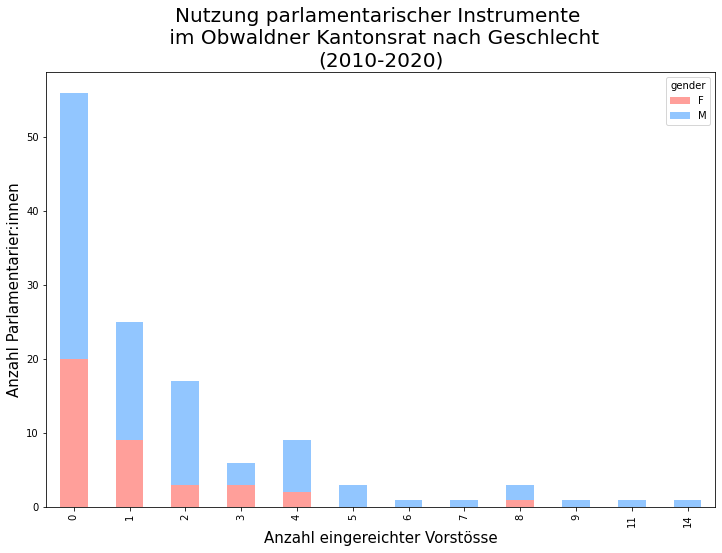

In [6]:
# plot verteilung -> gender

# group by year and affair type
df_get_number_of_affairs_total = df["number_of_affairs"].sum()

print(df_get_number_of_affairs_total)

df_gender = df.groupby([df.number_of_affairs, df.gender]).size().unstack()

print(df_gender)

# plot
df_gender.plot.bar(stacked=True, color=["C2", "C0",])


# misc
plt.title("Nutzung parlamentarischer Instrumente \n im Obwaldner Kantonsrat nach Geschlecht\n(2010-2020)", fontsize="20")
plt.xlabel("Anzahl eingereichter Vorstösse", size="15")
plt.ylabel("Anzahl Parlamentarier:innen", size="15")

plt.savefig('Fig_Verteilung Nutzung parlamentarischer Instrumente.png', dpi=300, bbox_inches='tight')

199
fraction           CSP Fraktion  CVP Fraktion  FDP Fraktion  SP Fraktion  \
number_of_affairs                                                          
0                           9.0          16.0          16.0          3.0   
1                           4.0           7.0           4.0          4.0   
2                           2.0           6.0           4.0          1.0   
3                           1.0           3.0           NaN          1.0   
4                           NaN           5.0           NaN          1.0   
5                           1.0           1.0           NaN          1.0   
6                           NaN           1.0           NaN          NaN   
7                           1.0           NaN           NaN          NaN   
8                           NaN           2.0           NaN          1.0   
9                           NaN           NaN           NaN          1.0   
11                          NaN           NaN           NaN          1.0   
14      

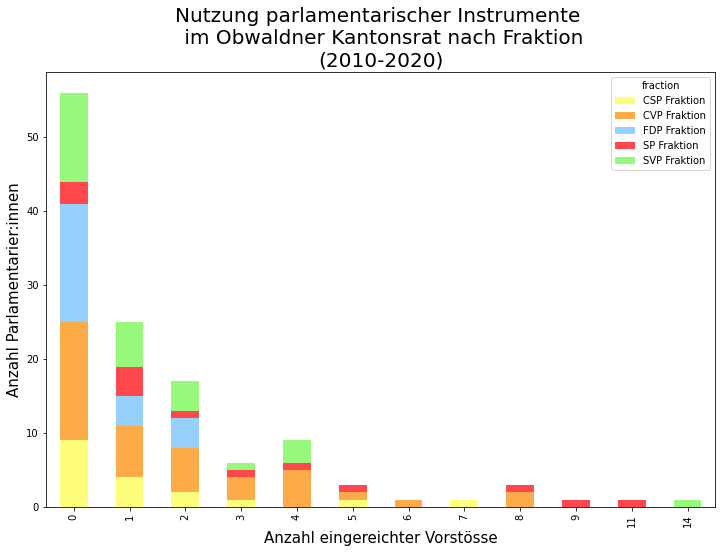

In [37]:
# plot verteilung -> fraction

# group by year and affair type
df_get_number_of_affairs_total = df["number_of_affairs"].sum()

print(df_get_number_of_affairs_total)

df_gender = df.groupby([df.number_of_affairs, df.fraction]).size().unstack()

print(df_gender)

# plot
df_gender.plot.bar(stacked=True, color=["xkcd:light yellow", "xkcd:light orange", "xkcd:light blue", "xkcd:light red", "xkcd:light green"])


# misc
plt.title("Nutzung parlamentarischer Instrumente \n im Obwaldner Kantonsrat nach Fraktion\n(2010-2020)", fontsize="20")
plt.xlabel("Anzahl eingereichter Vorstösse", size="15")
plt.ylabel("Anzahl Parlamentarier:innen", size="15")

plt.savefig('Fig_Verteilung Nutzung parlamentarischer Instrumente Fraktion.png', dpi=300, bbox_inches='tight')

gender                          F     M
number_of_debate_statements            
0                            14.0  15.0
1                             2.0  15.0
2                             5.0  10.0
3                             4.0   3.0
4                             4.0  10.0
5                             NaN   6.0
6                             3.0   3.0
7                             1.0   1.0
8                             NaN   1.0
9                             1.0   3.0
10                            NaN   1.0
11                            NaN   2.0
12                            1.0   NaN
13                            NaN   1.0
14                            NaN   2.0
15                            NaN   3.0
16                            NaN   2.0
17                            NaN   2.0
19                            NaN   1.0
20                            2.0   NaN
23                            NaN   2.0
24                            NaN   1.0
27                            NaN   1.0


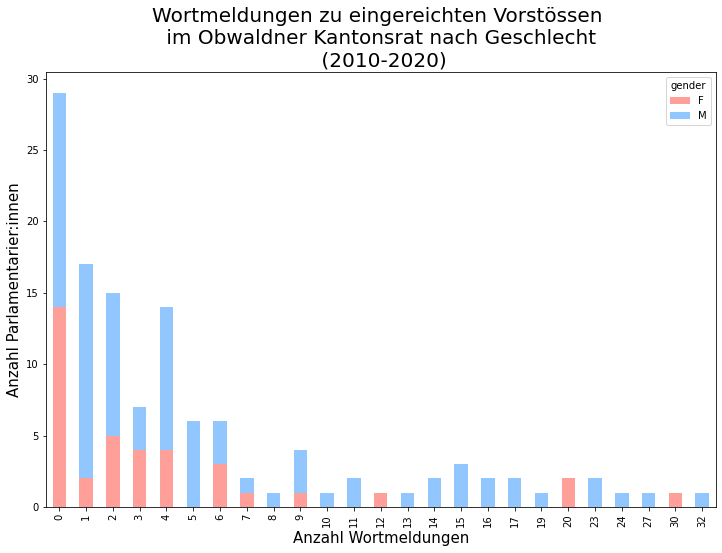

In [40]:
# plot wortmeldungen und gender

# group by year and affair type
df_discuss = df.groupby([df.number_of_debate_statements, df.gender]).size().unstack()

print(df_discuss)

# plot
df_discuss.plot.bar(stacked=True, color=["C2", "C0",])


# misc
plt.title("Wortmeldungen zu eingereichten Vorstössen \n im Obwaldner Kantonsrat nach Geschlecht \n (2010-2020)", fontsize="20")
plt.xlabel("Anzahl Wortmeldungen", size="15")
plt.ylabel("Anzahl Parlamentarier:innen", size="15")

plt.savefig('Fig_Anzahl eingereichter Vorstösse.png', dpi=300, bbox_inches='tight')

plt.savefig('Fig_Verteilung Wortmeldungen zu eingereichten Vorstössem.png', dpi=300, bbox_inches='tight')

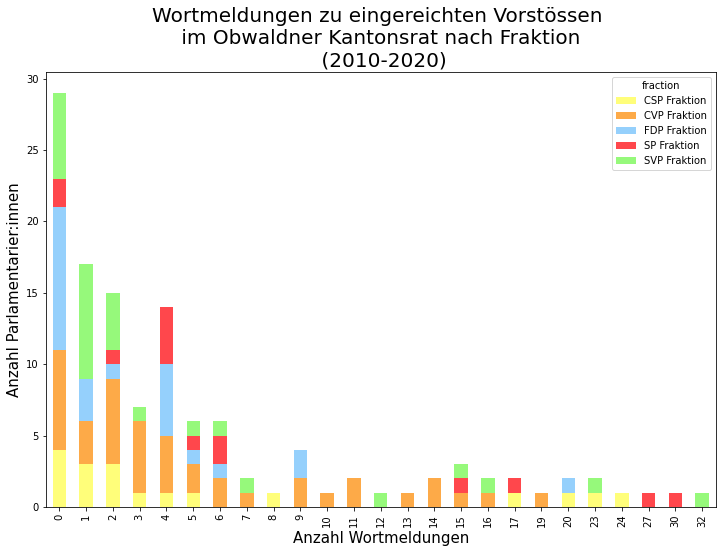

In [43]:
# plot wortmeldungen und fraktion

# group by year and affair type
df_discuss = df.groupby([df.number_of_debate_statements, df.fraction]).size().unstack()

#print(df_discuss)

# plot
df_discuss.plot.bar(stacked=True, color=["xkcd:light yellow", "xkcd:light orange", "xkcd:light blue", "xkcd:light red", "xkcd:light green"])


# misc
plt.title("Wortmeldungen zu eingereichten Vorstössen \n im Obwaldner Kantonsrat nach Fraktion \n (2010-2020)", fontsize="20")
plt.xlabel("Anzahl Wortmeldungen", size="15")
plt.ylabel("Anzahl Parlamentarier:innen", size="15")

plt.savefig('Fig_Anzahl eingereichter Vorstösse.png', dpi=300, bbox_inches='tight')

plt.savefig('Fig_Verteilung Wortmeldungen zu eingereichten Vorstössen nach Fraktion.png', dpi=300, bbox_inches='tight')

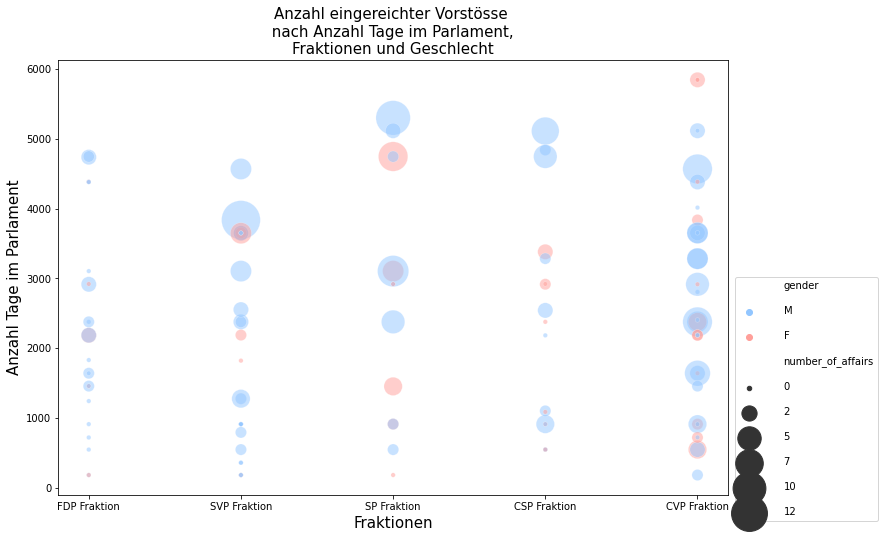

In [167]:
# plot
# seaborn
colors = ["C0", "C2"]

axes = sns.scatterplot(x=df["fraction"], 
                       y=df["days_in_parlament"], 
                       size=df["number_of_affairs"], 
                       sizes=(20, 1500),
                       alpha=0.5,
                       hue=df["gender"], 
                       palette=colors,
                       data=df)

# Legend split and place outside + title
plt.legend(bbox_to_anchor=(1.01, 0.5), 
           borderaxespad=0.,
           labelspacing=1.5,
           handletextpad=2.5)

#misc 
plt.ylabel("Anzahl Tage im Parlament", fontsize=15)
plt.xlabel("Fraktionen", fontsize=15)
plt.title("Anzahl eingereichter Vorstösse \n nach Anzahl Tage im Parlament, \nFraktionen und Geschlecht", fontsize=15)

plt.savefig('Fig_Anzahl eingereichter Vorstösse nach Tagen Fraktionen Geschlecht.png', dpi=300, bbox_inches='tight')

In [39]:
# regression
results = ols("number_of_affairs ~ "
          "age_in_days + "
          "C(fraction) + "
          "C(gender) + " 
          "number_of_debate_statements + "
          "C(city, Treatment(reference='Alpnach Dorf')) + "
          "distance_to_parlament + "
          #"pol + "
          "days_in_parlament" \
          , data=df).fit()


results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      number_of_affairs   R-squared:                       0.747
Model:                            OLS   Adj. R-squared:                  0.712
Method:                 Least Squares   F-statistic:                     21.26
Date:                Wed, 01 Sep 2021   Prob (F-statistic):           1.37e-25
Time:                        10:54:40   Log-Likelihood:                -199.92
No. Observations:                 124   AIC:                             431.8
Df Residuals:                     108   BIC:                             477.0
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept                      -0.0202      0.866     -0.023      0.981      -1.736       1.696
C(fraction)[T.CVP Fraktion]     1.0077      0.391      2.580      0.011       0.233       1.782
C(fraction)[T.FDP Fraktion]     0.1418      0.435      0.326      0.745      -0.721       1.004
C(fraction)[T.SP Fraktion]      1.4699      0.498      2.954      0.004       0.484       2.456
C(fraction)[T.SVP Fraktion]     0.7239      0.423      1.713      0.090      -0.114       1.561
C(gender)[T.M]                  0.3519      0.268      1.311      0.193      -0.180       0.884
C(city)[T.Engelberg]            0.3864      1.667      0.232      0.817      -2.919       3.691
C(city)[T.Giswil]               0.9543      0.689      1.385      0.169      -0.411       2.320
C(city)[T.Kerns]               -0.5902      0.480     -1.229      0.222      -1.542       0.362
C(city)[T.Lungern]              0.0276      1.225      0.022      0.982      -2.401       2.456
C(city)[T.Sachseln]            -0.7048      0.534     -1.320      0.190      -1.763       0.354
C(city)[T.Sarnen]              -0.5478      0.638     -0.859      0.392      -1.812       0.716
age_in_days                 -6.137e-06   1.47e-05     -0.419      0.676   -3.52e-05    2.29e-05
number_of_debate_statements     0.2728      0.020     13.898      0.000       0.234       0.312
distance_to_parlament       -7.307e-05      0.000     -0.587      0.558      -0.000       0.000
days_in_parlament           -1.148e-05   8.63e-05     -0.133      0.894      -0.000       0.000
==============================================================================
Omnibus:                        6.664   Durbin-Watson:                   1.856
Prob(Omnibus):                  0.036   Jarque-Bera (JB):                9.618
Skew:                           0.216   Prob(JB):                      0.00816
Kurtosis:                       4.294   Cond. No.                     3.72e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.72e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

/home/benjamin/.local/share/virtualenvs/polity_jupyter-xj9a_qv6/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


                            OLS Regression Results                            
Dep. Variable:      number_of_affairs   R-squared:                       0.691
Model:                            OLS   Adj. R-squared:                  0.689
Method:                 Least Squares   F-statistic:                     273.1
Date:                Wed, 01 Sep 2021   Prob (F-statistic):           6.36e-33
Time:                        13:43:11   Log-Likelihood:                -212.28
No. Observations:                 124   AIC:                             428.6
Df Residuals:                     122   BIC:                             434.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const             

/home/benjamin/.local/share/virtualenvs/polity_jupyter-xj9a_qv6/lib/python3.8/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


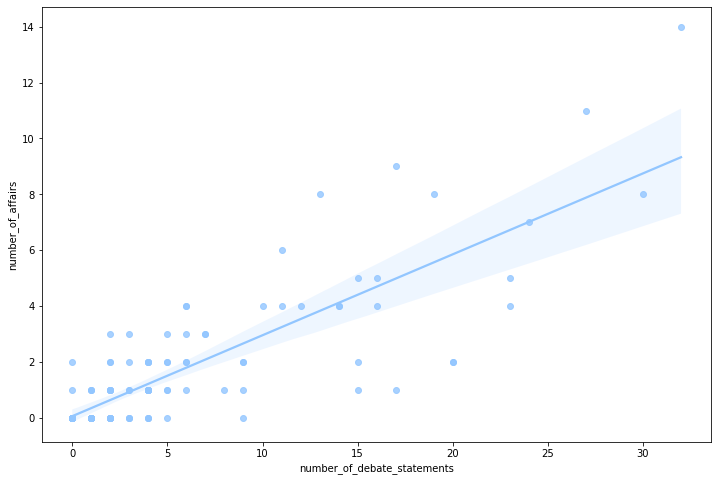

In [64]:
# bivariat number of debate statements and number of affairs

x = pd.DataFrame(df["number_of_debate_statements"])
y = pd.DataFrame(df["number_of_affairs"])

model = LinearRegression()
model.fit(x, y)

# plot
sns.regplot(x, y)

plt.savefig('Fig_MarginalE Nutzung statements.png', dpi=300, bbox_inches='tight')


# validation
X2 = df["number_of_debate_statements"]
X2 = sm.add_constant(X2)
olsmod = sm.OLS(df["number_of_affairs"], X2).fit()
print(olsmod.summary())

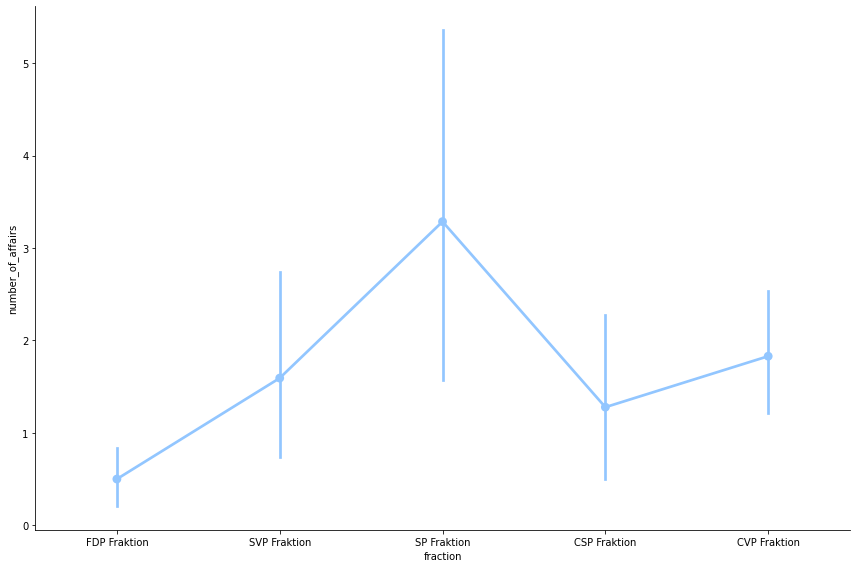

In [65]:
# bivariat number fraction and number of affairs

# plot
sns.catplot(x="fraction", y="number_of_affairs", kind="point", aspect=12/8, height=8, data=df)
#sns.catplot(x="fraction", y="number_of_affairs", data=df)
plt.savefig('Fig_MarginalE Nutzung fractions.png', dpi=300, bbox_inches='tight')



In [66]:
# define X and y
X = df[["age_in_days",
                    "fraction",
                    "gender",
                    "number_of_debate_statements",
                    "city", 
                    "distance_to_parlament",
                    "days_in_parlament" ]]


# dummy for categorial
X = pd.get_dummies(data=X, drop_first=False)

y = df["number_of_affairs"]

# init model
regression = LinearRegression()
model2 = regression.fit(X,y)

# olsmod + summary
olsmod = sm.OLS(y, X.astype(float)).fit()
#olsmod.summary()

/home/benjamin/.local/share/virtualenvs/polity_jupyter-xj9a_qv6/lib/python3.8/site-packages/seaborn/regression.py:581: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


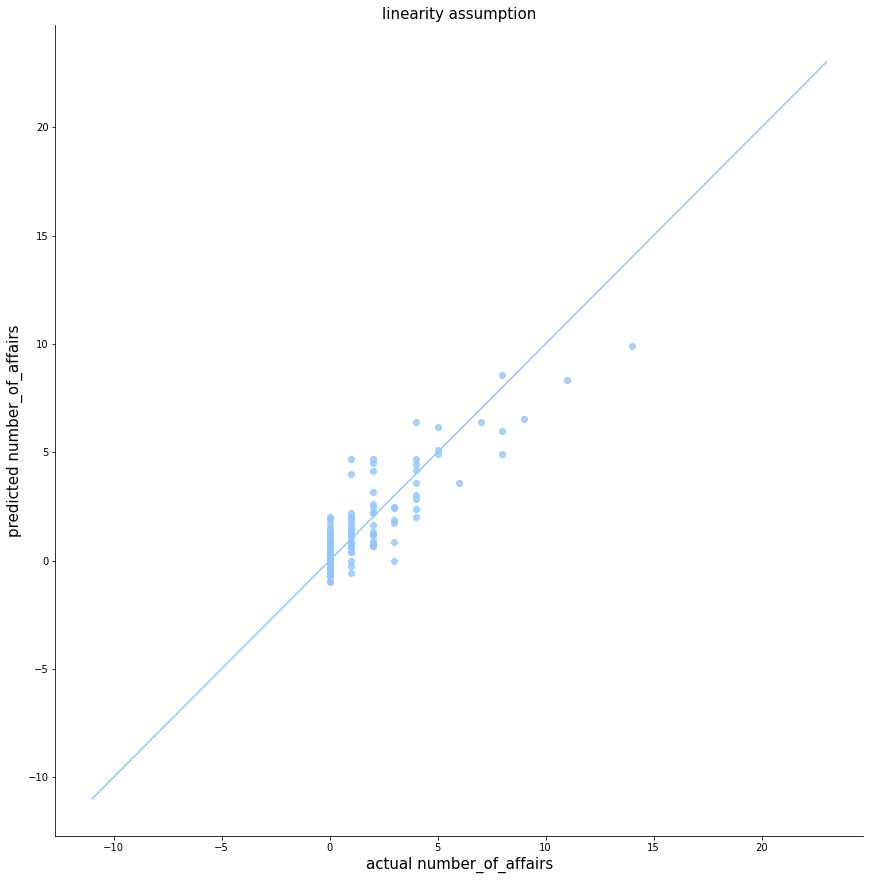

In [68]:
# assumption testing (linearity, normality, multicollinearity, autocorrelation, homoscedasticity)
# add columns anon_yes_pred and residual
df["number_of_affairs_pred"] = olsmod.predict(X)
df["residual"] = olsmod.resid

#df_affairs_def.head()

# ********************************************************************
# linearity
# ********************************************************************
# plotting the observed vs predicted values
sns.lmplot(x="number_of_affairs", y="number_of_affairs_pred", data=df, fit_reg=False, size=12)
# plotting the diagonal line
line_coords = np.arange(df[["number_of_affairs", "number_of_affairs_pred"]].min().min()-10,
                         df[["number_of_affairs", "number_of_affairs_pred"]].max().max()+10)

plt.plot(line_coords, line_coords) # X and y points
#misc
plt.ylabel("predicted number_of_affairs", fontsize=15)
plt.xlabel("actual number_of_affairs", fontsize=15)
plt.title("linearity assumption", fontsize=15)

plt.savefig('Fig_AV Nutzung linearity.png', dpi=300, bbox_inches='tight')

p-value from the test Anderson-Darling test below 0.05 generally means non-normal: 0.013157578909073677


/home/benjamin/.local/share/virtualenvs/polity_jupyter-xj9a_qv6/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


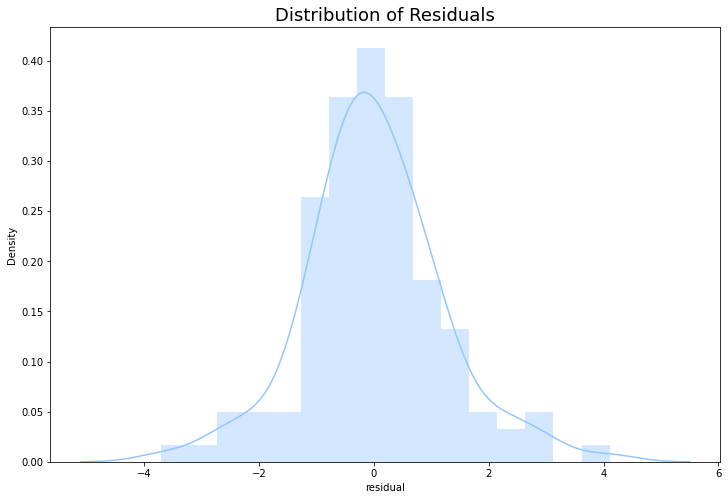

Residuals are not normally distributed
Statistics=6.664, p=0.036
Sample does not look Gaussian (reject H0)


In [75]:
# ********************************************************************
# normality
# ********************************************************************

# performing the test on the residuals
p_value = normal_ad(df["residual"])[1]
print('p-value from the test Anderson-Darling test below 0.05 generally means non-normal:', p_value)

# Plotting the residuals distribution
plt.subplots(figsize=(12, 8))
plt.title('Distribution of Residuals', fontsize=18)
sns.distplot(df['residual'])
plt.savefig('Fig_AV Nutzung normality.png', dpi=300, bbox_inches='tight')
plt.show()

# Reporting the normality of the residuals
if p_value < 0.05:
    print('Residuals are not normally distributed')
else:
    print('Residuals are normally distributed')
    

    
# normality test D’Agostino’s K^2 Test
stat, p = normaltest(df["residual"])
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Sample looks Gaussian (fail to reject H0)')
else:
	print('Sample does not look Gaussian (reject H0)')

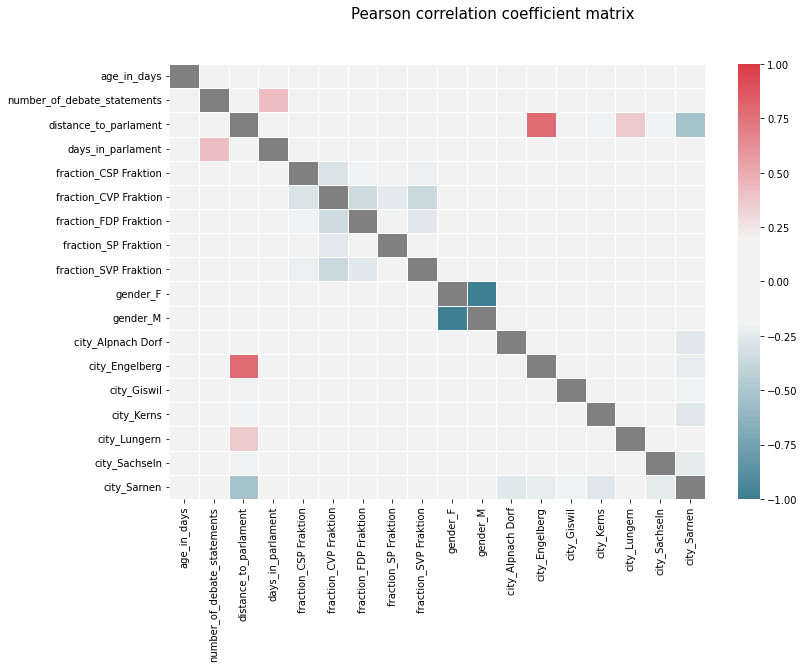

In [72]:
# ********************************************************************
# multicollinearity
# ********************************************************************

# corr = df_affairs_def[["anon_yes",
#                     "joint_signatories_count", 
#                     "affair_type",
#                     "number_of_debate_statements",
#                     "signatory_city",
#                     "signatory_distance_to_parlament",
#                     "signatory_fraction", 
#                     "signatory_days_in_parlament_at_submission",
#                     "recommendation" ]].corr()

corr = X.corr()
#print('Pearson correlation coefficient matrix of each variables:\n', corr)

# Generate a mask for the diagonal cell
mask = np.zeros_like(corr, dtype=bool)
np.fill_diagonal(mask, val=True)

# Initialize matplotlib figure
fig, ax = plt.subplots(figsize=(12, 8))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True, sep=50)
cmap.set_bad('grey')

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmin=-1, vmax=1, center=0, linewidths=.5)
fig.suptitle('Pearson correlation coefficient matrix', fontsize=15)
ax.tick_params(axis='both', which='major', labelsize=10)

plt.savefig('Fig_AV Nutzung multicollinearity.png', dpi=300, bbox_inches='tight')

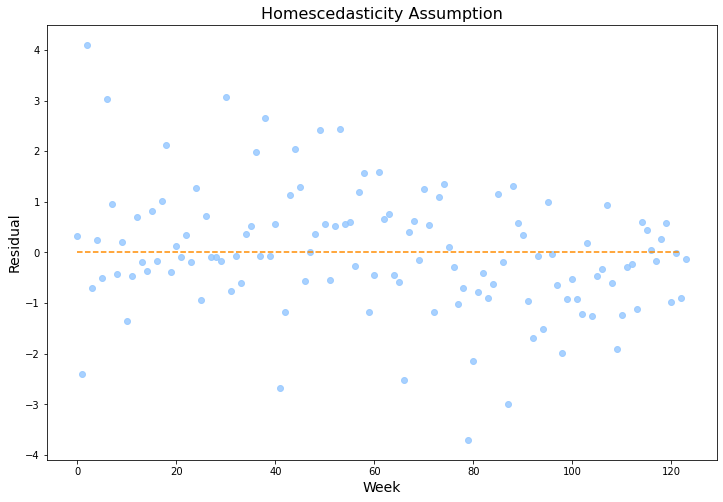

In [73]:
# ********************************************************************
# homoscedasticity (varianzhomogenität)
# ********************************************************************

# Plotting the residuals
plt.subplots(figsize=(12, 8))
plt.scatter(x=df.index, y=df.residual, alpha=0.8)
plt.plot(np.repeat(0, df.index.max()), color='darkorange', linestyle='--')

plt.ylabel('Residual', fontsize=14)
plt.xlabel('Week', fontsize=14)
plt.title('Homescedasticity Assumption', fontsize=16)
plt.savefig('Fig_AV Nutzung homoscedasticity.png', dpi=300, bbox_inches='tight')
plt.show()  
